## TITLE

Subheading

In [9]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as ss
%matplotlib inline
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', None)

Introduce plot

In [2]:
df = pd.read_csv("owid-covid-data.csv")

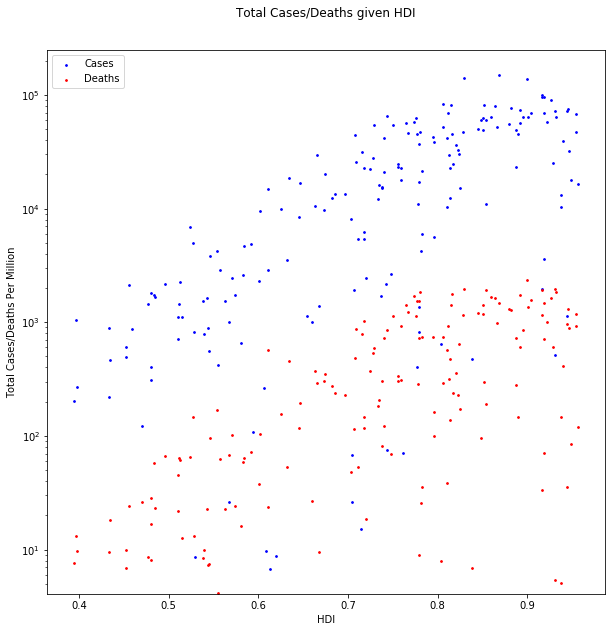

In [3]:
df2 = df[["total_tests","iso_code","location","date","total_cases_per_million","total_cases","total_deaths","total_deaths_per_million","human_development_index","population"]]
dfHDI = df2.loc[df['date'] == "2021-03-23"]
dfHDI = dfHDI.drop([798,4023,23782,24208,50944,52164,64162,75743])
dfHDI = dfHDI.reset_index()
x = dfHDI['human_development_index']
y1 = dfHDI['total_cases_per_million']
y2 = dfHDI['total_deaths_per_million']
fig1 = plt.figure(figsize = (10, 10))
ax1 = fig1.add_subplot()
plt.scatter(x, y1, s=3, alpha=1, c="b")
plt.scatter(x, y2, s=3, alpha=1, c="r")
ax1.set_yscale('log')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Total Cases/Deaths Per Million")
plt.xlabel("HDI")
plt.title("Total Cases/Deaths given HDI", fontsize = 12, y = 1.05)
plt.legend((("Cases"), ("Deaths")), loc = "upper left", fontsize = 10)
plt.show()

Explain flaws and give an overview on how you will challenge them. Add correlation values to justify why you're doing this.

In [4]:
dfHDI['pop% Cases'] = dfHDI['total_cases']*100/dfHDI['population']
dfHDI['pop% Deaths'] = dfHDI['total_deaths']*100/dfHDI['population']
dfHDI[['location','pop% Cases','pop% Deaths']]

,location,pop% Cases,pop% Deaths
0,Afghanistan,0.144309,0.006335
1,Albania,4.234033,0.074918
2,Algeria,0.265328,0.006992
3,Andorra,15.001618,0.146250
4,Angola,0.066250,0.001613
5,Antigua and Barbuda,1.102851,0.028592
6,Argentina,5.003956,0.121301
7,Armenia,6.243854,0.114200
8,Australia,0.114593,0.003565
9,Austria,5.773450,0.101272


In [5]:
BMI = pd.read_csv("NCD_RisC_Lancet_2017_BMI_age_standardised_country.csv", encoding= 'unicode_escape')
BMI = BMI.loc[BMI['Year'] == 2016]
BMIMen = BMI.loc[BMI['Sex'] == 'Men']
BMIMen = BMIMen.reset_index()
BMIMen = BMIMen[["ISO", "Mean BMI", "Prevalence of BMI>=30 kg/m² (obesity)", "Prevalence of BMI>=35 kg/m² (severe obesity)"]]

In [6]:
mergedDF = dfHDI
mergedDF = mergedDF.merge(BMIMen, left_on = "iso_code", right_on = 'ISO')

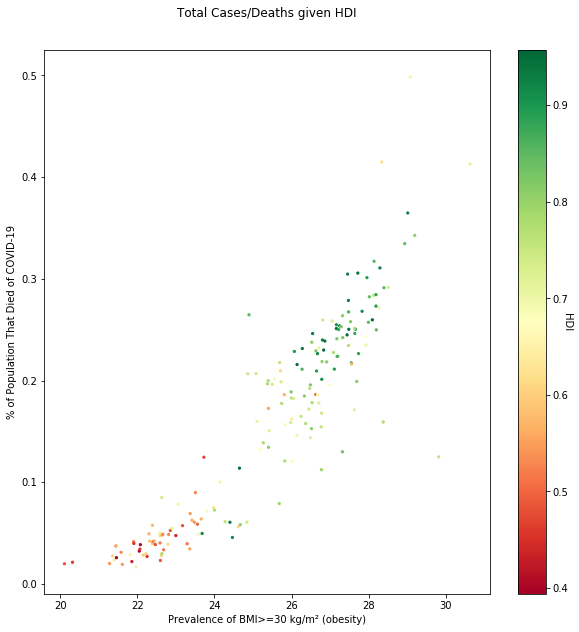

In [7]:
x = mergedDF['Mean BMI']
y = mergedDF['Prevalence of BMI>=30 kg/m² (obesity)']
fig3 = plt.figure(figsize = (10, 10))
ax3 = fig3.add_subplot()
plt.scatter(x, y, s = 5, alpha = 1, c = mergedDF.human_development_index, cmap = 'RdYlGn')
cbar = plt.colorbar()
cbar.ax.set_ylabel('HDI', rotation=270)
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("% of Population That Died of COVID-19")
plt.xlabel("Prevalence of BMI>=30 kg/m² (obesity)")
plt.title("Total Cases/Deaths given HDI", fontsize = 12, y = 1.05)
plt.show()

In [33]:
dfTEST = df.loc[df['date'] == "2021-03-16"]
dfTEST = dfTEST[["total_tests","total_tests_per_thousand","new_tests","location","date","human_development_index","population"]]
dfTEST['pop% Test'] = dfTEST['total_tests']*100/dfTEST['population']
dfTEST = dfTEST.dropna()
dfTEST

,total_tests,total_tests_per_thousand,new_tests,location,date,human_development_index,population,pop% Test
1184,494745.0,171.918,3005.0,Albania,2021-03-16,0.795,2.877800e+06,17.191778
3201,6956319.0,153.915,37066.0,Argentina,2021-03-16,0.845,4.519578e+07,15.391524
3589,780085.0,263.255,3242.0,Armenia,2021-03-16,0.776,2.963234e+06,26.325461
4832,18840867.0,2091.942,355721.0,Austria,2021-03-16,0.922,9.006400e+06,209.194206
6373,4301065.0,26.116,20748.0,Bangladesh,2021-03-16,0.632,1.646894e+08,2.611623
7549,10257056.0,885.021,74130.0,Belgium,2021-03-16,0.931,1.158962e+07,88.502121
8743,566028.0,733.566,2273.0,Bhutan,2021-03-16,0.654,7.716120e+05,73.356557
9121,815270.0,69.842,7163.0,Bolivia,2021-03-16,0.718,1.167303e+07,6.984220
9505,722446.0,220.203,5403.0,Bosnia and Herzegovina,2021-03-16,0.780,3.280815e+06,22.020321
12982,26068778.0,690.707,72540.0,Canada,2021-03-16,0.929,3.774216e+07,69.070716


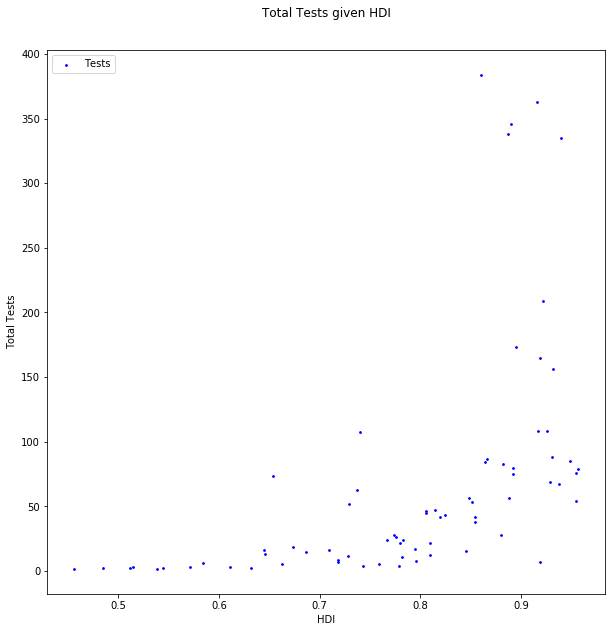

In [36]:
x = dfTEST['human_development_index']
y = dfTEST['pop% Test']
fig4 = plt.figure(figsize = (10, 10))
ax4 = fig4.add_subplot()
plt.scatter(x, y, s=3, alpha=1, c="b", label = "Tests")
#ax4.set_yscale('log')
plt.yticks(fontsize = 10)
plt.xticks(fontsize = 10)
plt.ylabel("Total Tests")
plt.xlabel("HDI")
plt.title("Total Tests given HDI", fontsize = 12, y = 1.05)
plt.legend( loc = "upper left", fontsize = 10)
plt.show();